In [1]:
%matplotlib inline

In [2]:

import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../dataset_generator/")
from environments import Environments

import umap
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("project_style.mplstyle")

import stats
import analysis_tools

In [3]:
model_name = f"../models/al1_10_l2_0"
path = f"../models/{model_name}"
model, params = analysis_tools.load_model(path, device = "cpu", model_type = "RNN")

In [4]:
env = Environments()
sequence = list(env.envs)
n_envs = len(sequence)
limits = 1.1*np.array([-1.5, 1.5, -1.5, 1.5])

timesteps = 10000

In [5]:
recurrent_weights = model.g.weight_hh_l0.detach().cpu().numpy()

In [6]:
eps = 1e-3
nonzero = np.sum(np.abs(recurrent_weights), axis = -1) > eps

In [7]:
context_weights = model.g.weight_ih_l0.detach().cpu().numpy()[:,2:] # first two are velocity inputs

In [8]:
recurrent_eigenvalues = np.linalg.eigvals(recurrent_weights)
recurrent_eigenvalues = recurrent_eigenvalues[np.real(recurrent_eigenvalues) == recurrent_eigenvalues]
recurrent_eigenvalues = np.real(recurrent_eigenvalues)

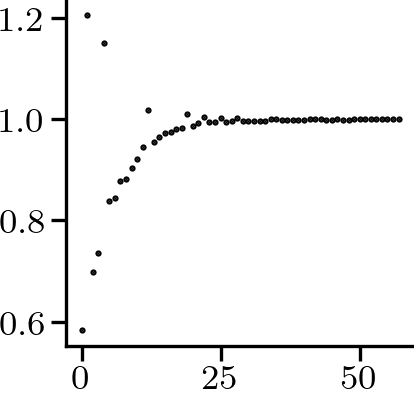

In [15]:
plt.plot(recurrent_eigenvalues, "k.")
# plt.axis([-5, len(recurrent_eigenvalues)*1.05, 0.5, np.amax(recurrent_eigenvalues)*1.05])
plt.savefig("figures/low_dim_panel/recurrent_eigenvals")

In [26]:
corr = np.zeros((n_envs, n_envs))

for i in range(n_envs):
    for j in range(n_envs):
        corr[i,j] = np.corrcoef(context_weights[:,i], context_weights[:,j])[0,1]

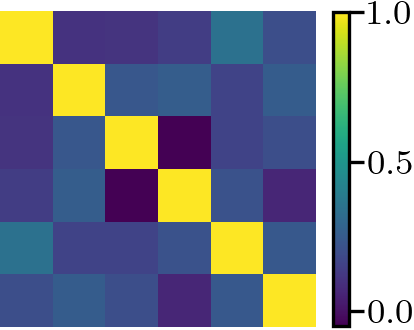

In [29]:
plt.imshow(corr)
plt.colorbar(pad = 0.05, fraction = 0.045)
plt.axis("off")
plt.savefig("figures/low_dim_panel/context_weight_corr")

In [24]:
corr = np.zeros((len(recurrent_weights), len(recurrent_weights)))

for i in range(len(recurrent_weights)):
    for j in range(len(recurrent_weights)):
        corr[i,j] = np.corrcoef(recurrent_weights[:,i], recurrent_weights[:,j])[0,1]

(-0.5, 499.5, 499.5, -0.5)

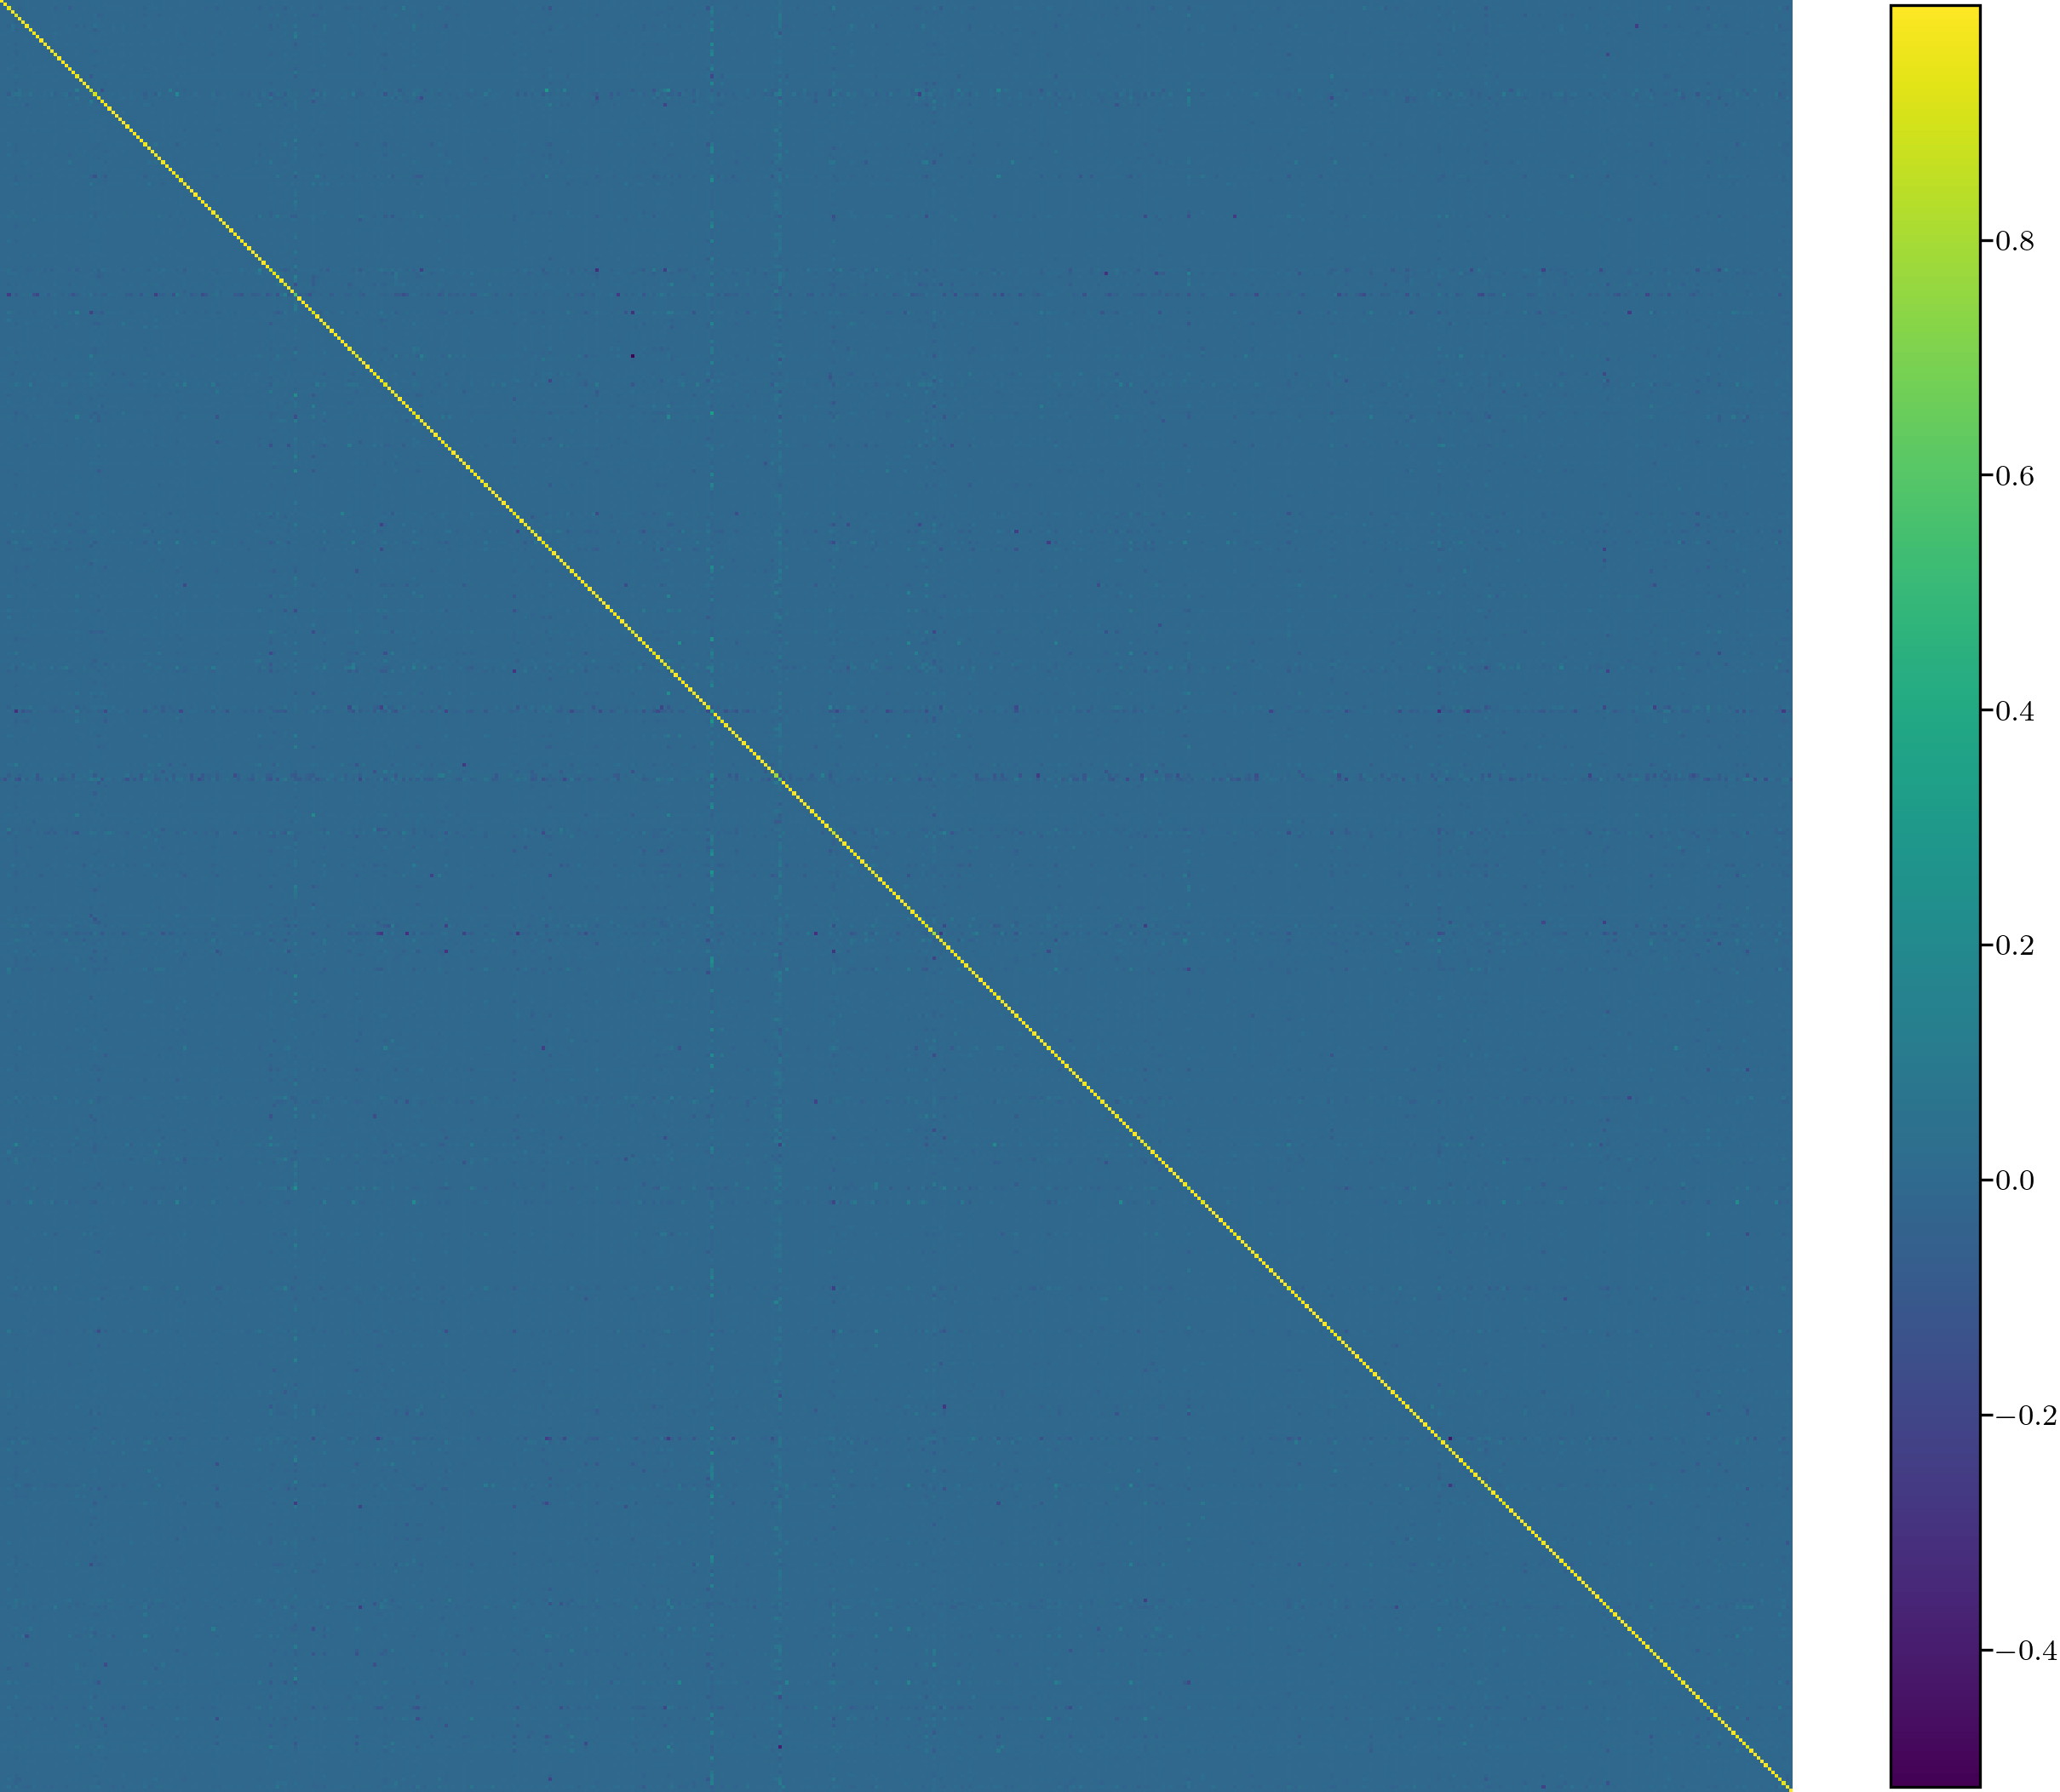

In [25]:
plt.figure(figsize = (10,10))
plt.imshow(corr)#, cmap = "coolwarm")
plt.colorbar(pad = 0.05, fraction = 0.045)
plt.axis("off")

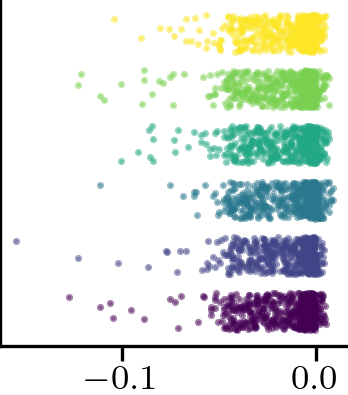

In [18]:
for i in range(n_envs):
    plt.scatter(context_weights[:,i], i*context_weights.shape[0]*1.5 + np.arange(context_weights.shape[0]), s = 0.5, alpha = 0.5)
    plt.yticks([])
plt.savefig("figures/low_dim_panel/context_weights_jitter")

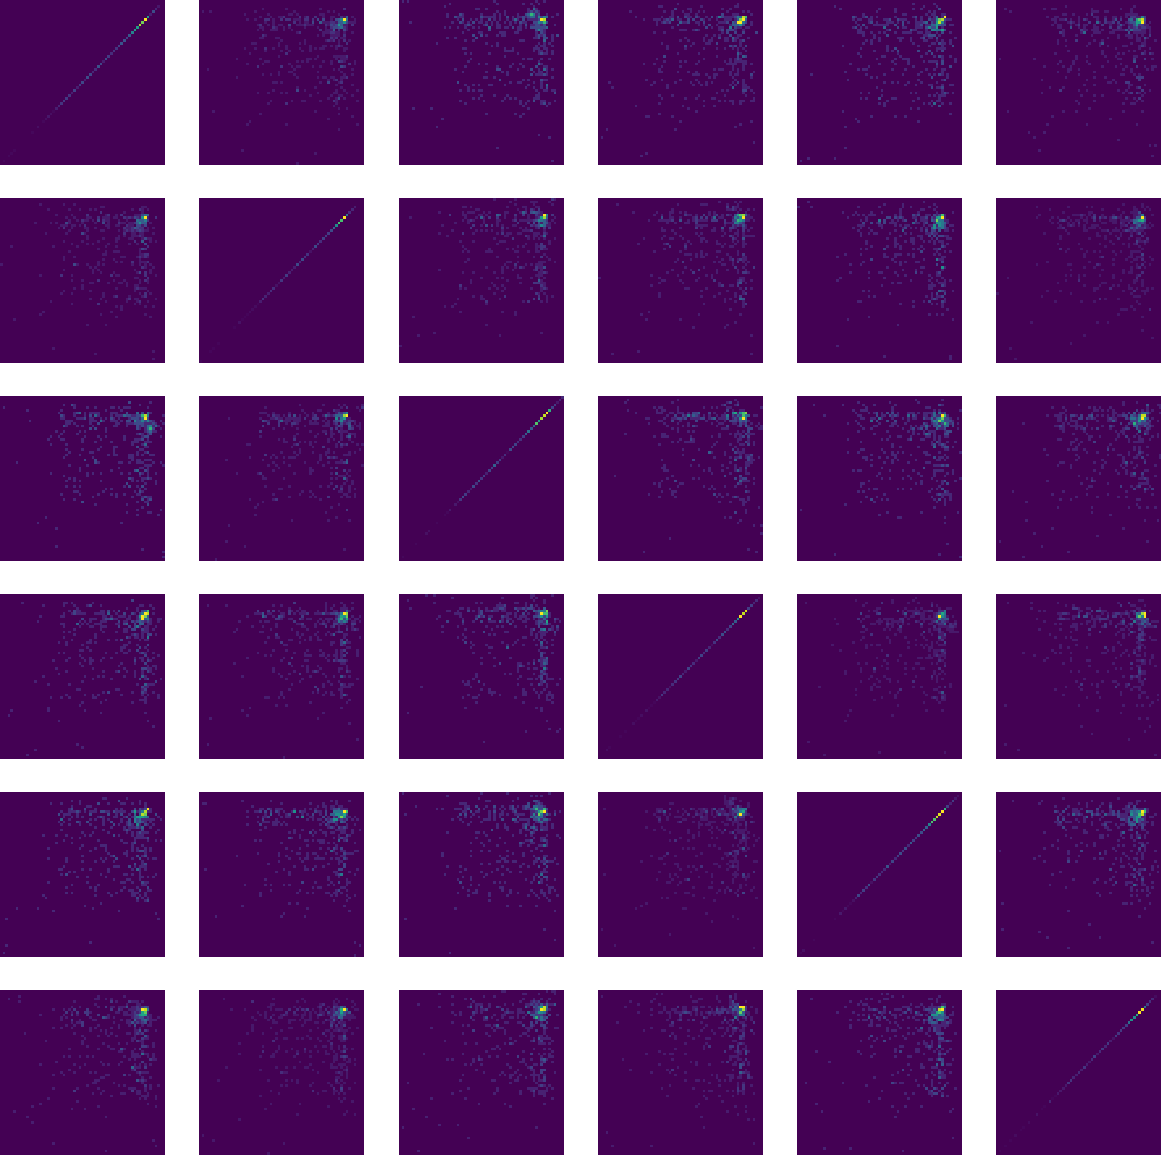

In [13]:
fig, ax = plt.subplots(n_envs, n_envs, figsize = (5, 5))

bins = np.linspace(np.amin(context_weights)*0.5, np.amax(context_weights), 64)

for i in range(n_envs):
    for j in range(n_envs):
        hist = np.histogram2d(context_weights[:,i], context_weights[:,j], bins = bins)[0]
        ax[i,j].imshow(hist.T, origin = "lower")
        ax[i,j].axis("off")

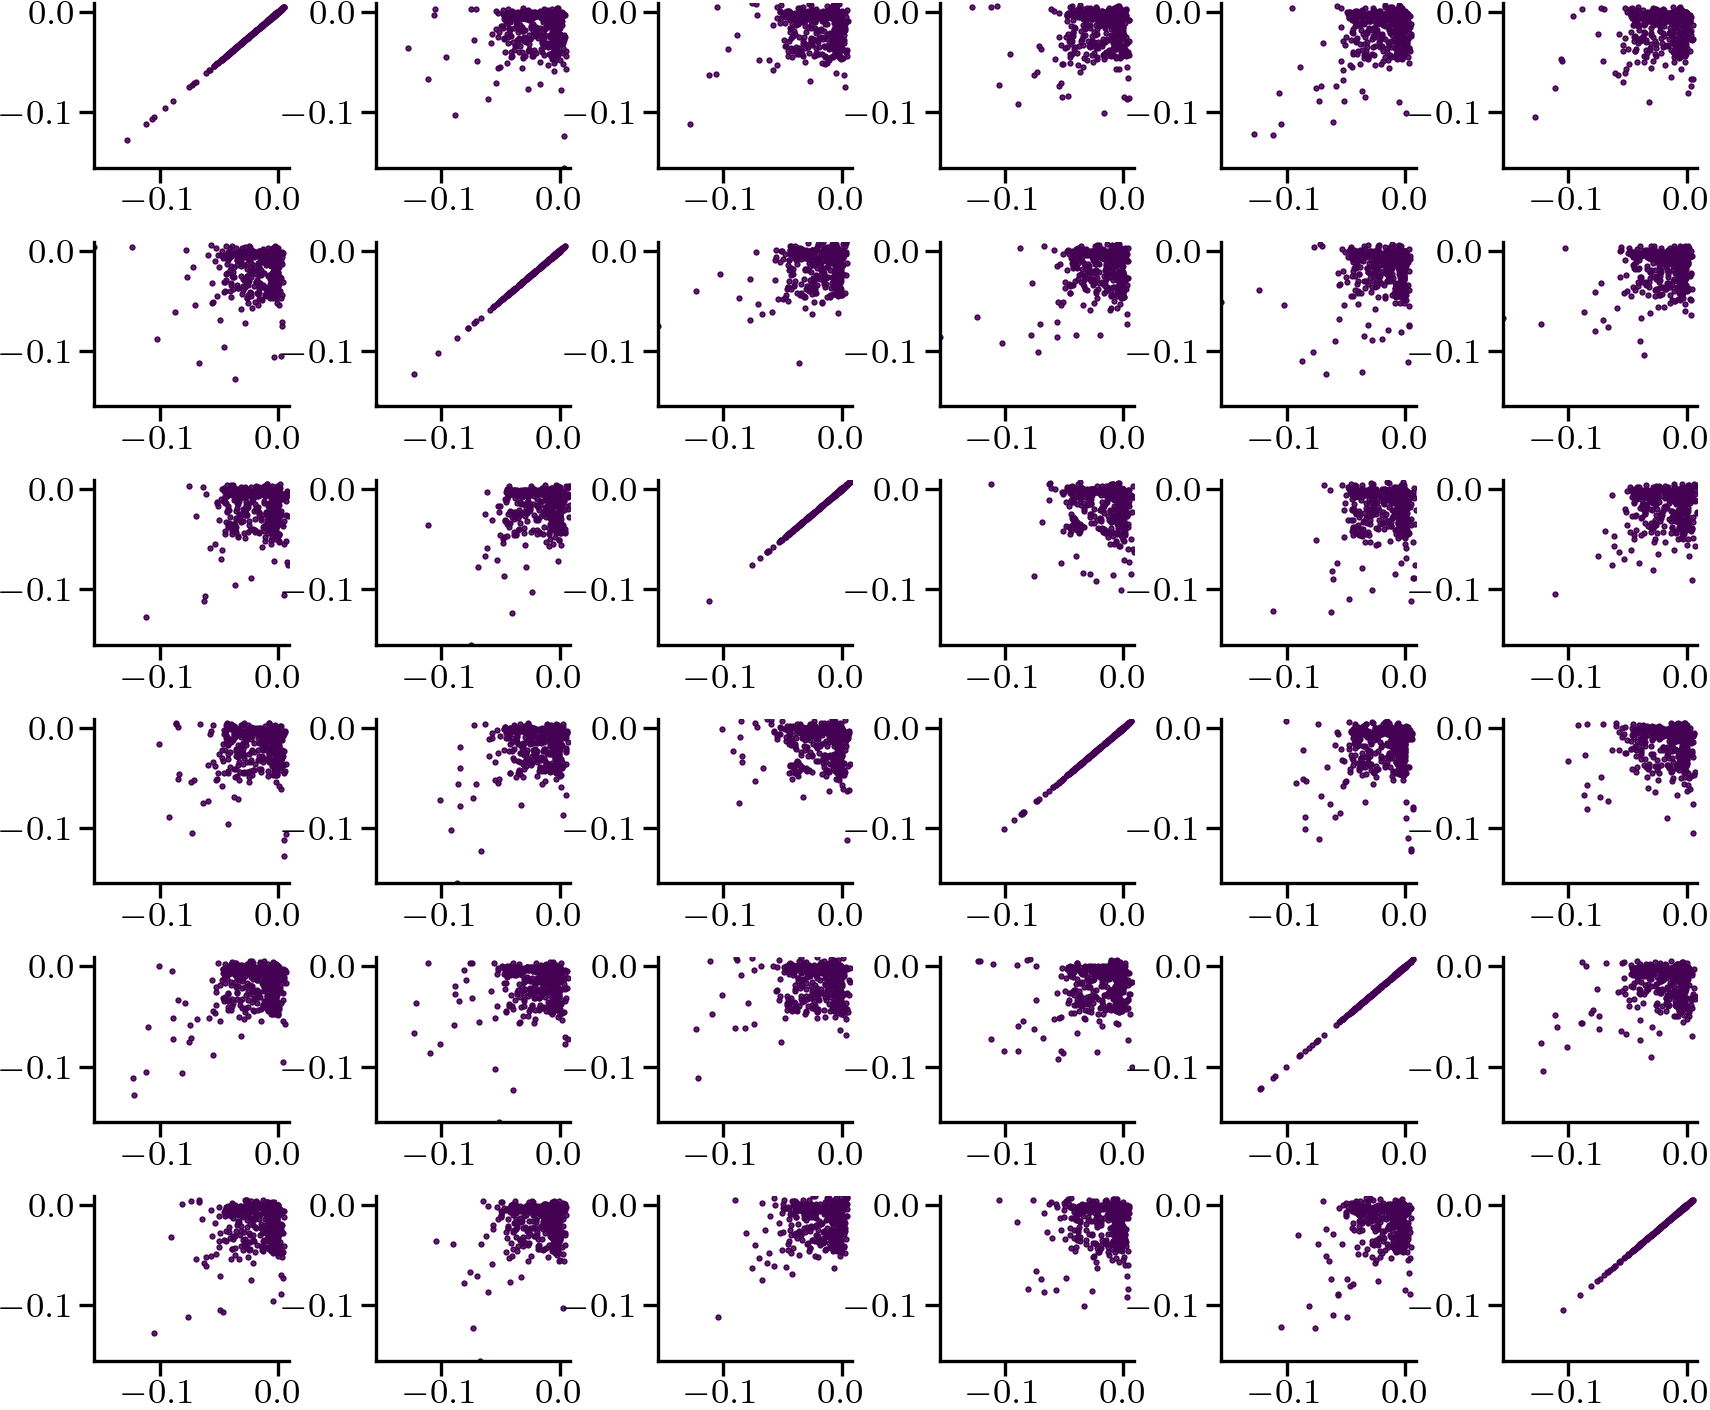

In [14]:
fig, ax = plt.subplots(n_envs, n_envs, figsize = (6, 5))

lims = [np.amin(context_weights), np.amax(context_weights), np.amin(context_weights), np.amax(context_weights)]

for i in range(n_envs):
    for j in range(n_envs):
        ax[i,j].plot(context_weights[:,i], context_weights[:,j], ".")
        ax[i,j].axis(lims)
plt.tight_layout()

plt.subplots_adjust(wspace=0.45, hspace= 0.45)